In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop


Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train))
print(len(x_test))
print(x_train[0].shape)
print(x_train[0])

11493376/11490434 [==============================] - 1s 0us/step
60000
10000
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39

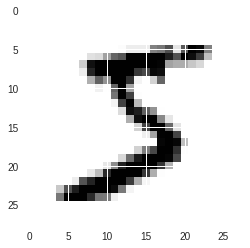

In [4]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train[0])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train[0])
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [6]:
num_classes = 10
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [9]:
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.8372 - acc: 0.7354 - val_loss: 0.3066 - val_acc: 0.9150
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.4515 - acc: 0.8642 - val_loss: 0.2374 - val_acc: 0.9292
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3864 - acc: 0.8860 - val_loss: 0.2081 - val_acc: 0.9391
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3489 - acc: 0.8961 - val_loss: 0.1970 - val_acc: 0.9413
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3233 - acc: 0.9056 - val_loss: 0.1848 - val_acc: 0.9434
Epoch 6/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3103 - acc: 0.9099 - val_loss: 0.1783 - val_acc: 0.9472
Epoch 7/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2997 - acc: 0.9128 - val_loss: 0.1726 - val_acc

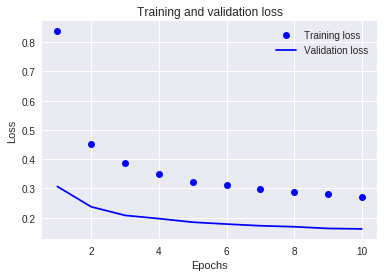

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_x = range(1, epochs + 1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

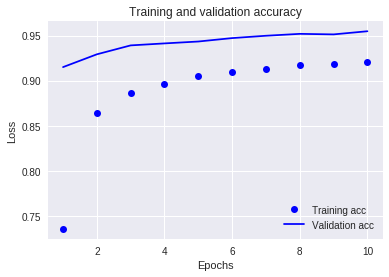

In [11]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16180218533352017
Test accuracy: 0.9548


In [13]:
print(y_train[10])
print(model.predict(x_train[10].reshape((1,784))))
print(model.predict_classes(x_train[10].reshape((1,784))))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[4.3844765e-11 5.4122140e-08 2.2093270e-06 9.9997592e-01 3.4169678e-10
  7.9539377e-06 7.7330069e-13 1.3745694e-08 1.0258155e-05 3.6138558e-06]]
[3]


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(x_test)
import numpy as np
y_test_c = np.argmax(y_test, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_c, y_pred))
print('Classification Report')
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test_c, y_pred, target_names=target_names))

Confusion Matrix
[[ 959    0    0    1    2    3    8    2    4    1]
 [   0 1117    6    1    0    1    3    0    7    0]
 [   4    1  993    4    4    1    6    7   12    0]
 [   0    0   19  960    0    8    0    9   14    0]
 [   1    5    2    1  936    1   15    2    2   17]
 [   7    2    1   20    4  828   14    3   10    3]
 [   6    4    2    0    5   11  928    0    2    0]
 [   1    9   19    2    3    0    0  978    1   15]
 [   5    4   10   15    4    6    8    7  914    1]
 [   9    5    0   10   20    7    1   10   12  935]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.96      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.96      0.95      0.96       982
           5       0.96      0.93      0.94       892
           6       0.94      0.97      0.96       9

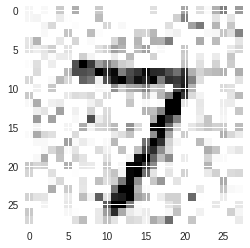

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Test loss: 1.2495677275180817
Test accuracy: 0.7217


In [15]:
(xtr,ytr ), (x_te,y_te) = mnist.load_data()
x_te = x_te.reshape(10000, 784)
x_te = x_te.astype('float32')
x_te /= 255
import numpy as np
mean = 0.
stddev = 0.2
noise = np.random.normal(mean, stddev, (10000, 784))
x_te = x_te + noise
x_te = np.clip(x_te, 0., 1.)

plt.imshow(x_te.reshape(10000, 28,28)[0], cmap=plt.cm.binary)
plt.show()

print(y_test[0])
score = model.evaluate(x_te, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])